## this file is read the .npy files and plot 
## to compare the scale learn and false with different scale



In [10]:
import os
import re
import numpy as np
pde_task = 'Poisson'
# 设定文件夹路径，这里假设.npy文件与脚本在同一目录下
folder_path = '../Result/'+pde_task

folder_path

'../Result/Poisson'

In [11]:
from pydantic import BaseModel,validator
class User_Data_info(BaseModel):
  
   folder_name:str
   loss_file:str
   omega_file:str
   loss_data: np.ndarray
   
   class Config:
        arbitrary_types_allowed = True  # Allow arbitrary types
   def __init__(self, **data):
        super().__init__(**data)
        self.loss_file = f"{self.folder_name}/{self.loss_file}"
        self.omega_file = f"{self.folder_name}/{self.omega_file}"
   @validator('loss_file', 'omega_file')
   def account_id_must_be_npy(cls,value):
      assert value.endswith('.npy'), "File must be a .npy file"
      return value

Data_folder={"folder_name":"liangaoming","loss_file":"loss.npy","omega_file":"omega.npy","loss_data":np.array([])}
read_data_info=User_Data_info(**Data_folder)

## 按照文件的名字读取，并且声称类的变量
在agent.py  保存
record = np.array([[epoch, train_loss,test_loss,pde_loss,bc_loss,data_loss]])
            

In [13]:

import matplotlib.pyplot as plt
#this is to read the data from the file
#合并字典 注意Learn_scale_false
class Merge_Exprs_Data():
   #根据文件夹
   def __init__(self,exprs_order=[],folder_structure=""):
      #self.folder_structure=f"Expr1_6_{expr_name+1}_PINN_Seed_{seed}_Scale coeff_{scale_str}_Learn_scale_false",
      
      self.exprs_num=exprs_order #查找的expr的开始和结束在list
      self.seed_list=[1,42,100]
      self._folder_structure=folder_structure
      self.scale=[]
      self.end_exprs_num=exprs_order[-1]
      self.start_exprs_num=exprs_order[0]
      self.dict={}
      
   def merge(self,return_dict:dict)->dict: 
      
      scale=0
      for expr_name in range(self.start_exprs_num,self.end_exprs_num+1):
         scale+=1
         self.scale.append(scale)
         #按照seed
         for seed in self.seed_list:
            
            scale_str = ','.join(map(str, self.scale))  # 将所有元素转换为字符串并用逗号连接
            
            Data_folder={"folder_name":self._folder_structure.format(expr_name,seed,scale_str),
                     "loss_file":"loss.npy",
                     "omega_file":"omega.npy",
                     "loss_data":np.array([])}
            
            read_data_info=User_Data_info(**Data_folder)
            
            #搜获的地址
            search_folder="../Result/Poisson/"+read_data_info.folder_name
            # 遍历文件夹中的文件
            for filename in os.listdir(search_folder):
               match = re.match(r'(.*)loss.npy', filename)
               if (match):
                  # 加载.npy文件
                  print("match",filename)
                  file_path = os.path.join(search_folder, filename)
                  read_data_info.loss_data=np.load(file_path)
            
                  return_dict[read_data_info.folder_name]=read_data_info
      self.dict=return_dict
      return return_dict

   def Get_Min_from_diffseed(self,re_expr,se_dict={}):
      MIN=[]
      #  提取seed
      for key in se_dict.keys():
         # 如果键匹配模式
         if re.search(re_expr, key):
            # 提取该键的 loss_data
            print("get_key for min",key)
            #dataloss 的min
            min=np.min(self.dict[key].loss_data[:,-1])
            MIN.append(min)
         else:
            print("not match")
      Mean_MIN=np.mean(MIN)
      Std=np.std(MIN)
      return Mean_MIN,Std

scale_false_return_dict={}
merge__false_data=Merge_Exprs_Data(exprs_order=[1,5],folder_structure="Expr1_6_{}_PINN_Seed_{}_Scale coeff_{}_Learn_scale_false")
scale_false_dict=merge__false_data.merge(scale_false_return_dict)

scale_false_dict.keys()


match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy


dict_keys(['Expr1_6_1_PINN_Seed_1_Scale coeff_1_Learn_scale_false', 'Expr1_6_1_PINN_Seed_42_Scale coeff_1_Learn_scale_false', 'Expr1_6_1_PINN_Seed_100_Scale coeff_1_Learn_scale_false', 'Expr1_6_2_PINN_Seed_1_Scale coeff_1,2_Learn_scale_false', 'Expr1_6_2_PINN_Seed_42_Scale coeff_1,2_Learn_scale_false', 'Expr1_6_2_PINN_Seed_100_Scale coeff_1,2_Learn_scale_false', 'Expr1_6_3_PINN_Seed_1_Scale coeff_1,2,3_Learn_scale_false', 'Expr1_6_3_PINN_Seed_42_Scale coeff_1,2,3_Learn_scale_false', 'Expr1_6_3_PINN_Seed_100_Scale coeff_1,2,3_Learn_scale_false', 'Expr1_6_4_PINN_Seed_1_Scale coeff_1,2,3,4_Learn_scale_false', 'Expr1_6_4_PINN_Seed_42_Scale coeff_1,2,3,4_Learn_scale_false', 'Expr1_6_4_PINN_Seed_100_Scale coeff_1,2,3,4_Learn_scale_false', 'Expr1_6_5_PINN_Seed_1_Scale coeff_1,2,3,4,5_Learn_scale_false', 'Expr1_6_5_PINN_Seed_42_Scale coeff_1,2,3,4,5_Learn_scale_false', 'Expr1_6_5_PINN_Seed_100_Scale coeff_1,2,3,4,5_Learn_scale_false'])

In [14]:
scale_learn_retrun_dcit={}
merge__learn_data=Merge_Exprs_Data(exprs_order=[6,10],folder_structure="Expr1_6_{}_PINN_Seed_{}_Scale coeff_{}_Learn_scale_true")
scale_learn_dict=merge__learn_data.merge(scale_learn_retrun_dcit)


match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy
match loss.npy


In [15]:
scale_learn_dict


{'Expr1_6_6_PINN_Seed_1_Scale coeff_1_Learn_scale_true': User_Data_info(folder_name='Expr1_6_6_PINN_Seed_1_Scale coeff_1_Learn_scale_true', loss_file='Expr1_6_6_PINN_Seed_1_Scale coeff_1_Learn_scale_true/loss.npy', omega_file='Expr1_6_6_PINN_Seed_1_Scale coeff_1_Learn_scale_true/omega.npy', loss_data=array([[0.00000000e+00, 1.78272578e+05, 1.77254516e+05, 1.77252547e+05,
         1.01725388e+00, 9.60700750e-01],
        [1.00000000e+01, 1.78246391e+05, 1.77256250e+05, 1.77254312e+05,
         9.89312232e-01, 9.46525812e-01],
        [2.00000000e+01, 1.78209766e+05, 1.77262062e+05, 1.77260203e+05,
         9.43996191e-01, 9.27825987e-01],
        [3.00000000e+01, 1.78110953e+05, 1.77267812e+05, 1.77266094e+05,
         8.26596439e-01, 8.97061586e-01],
        [4.00000000e+01, 1.77895281e+05, 1.77163922e+05, 1.77162234e+05,
         7.38299310e-01, 9.49888587e-01]])),
 'Expr1_6_6_PINN_Seed_42_Scale coeff_1_Learn_scale_true': User_Data_info(folder_name='Expr1_6_6_PINN_Seed_42_Scale coeff_

## x-axis info 
scale is adding the scale coeff 1,2,3,4,5 for scales is not learning

In [16]:
scale=[1,2,3,4,5]
y_scale_false_info={"mean":[],"Std":[]}
y_scale_learn_info={"mean":[],"Std":[]}
#  提取seed的平均和标准差
# for expr in x_info:

#    Mean,std =merge_data.Get_Min_from_diffseed(re_expr=f"Expr1_6_{expr}",
#                                               se_dict=scale_false_dict)
#    y_scale_false_info["mean"].append(Mean)
#    y_scale_false_info["Std"].append(std)

for index,expr in enumerate(scale):

   Mean,std =merge__false_data.Get_Min_from_diffseed(re_expr=f"Expr1_6_{index+1}",
                                                      se_dict=scale_false_dict)
   y_scale_false_info["mean"].append(Mean)
   y_scale_false_info["Std"].append(std)
   
y_scale_false_info

get_key for min Expr1_6_1_PINN_Seed_1_Scale coeff_1_Learn_scale_false
get_key for min Expr1_6_1_PINN_Seed_42_Scale coeff_1_Learn_scale_false
get_key for min Expr1_6_1_PINN_Seed_100_Scale coeff_1_Learn_scale_false
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
get_key for min Expr1_6_2_PINN_Seed_1_Scale coeff_1,2_Learn_scale_false
get_key for min Expr1_6_2_PINN_Seed_42_Scale coeff_1,2_Learn_scale_false
get_key for min Expr1_6_2_PINN_Seed_100_Scale coeff_1,2_Learn_scale_false
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
get_key for min Expr1_6_3_PINN_Seed_1_Scale coeff_1,2,3_Learn_scale_false
get_key for min Expr1_6_3_PINN_Seed_42_Scale coeff_1,2,3_Learn_scale_false
get_key for min Expr1_6_3_PINN_Seed_100_Scale coeff_1,2,3_Learn_scale_false
not match
not match
not match
not match
not

{'mean': [0.9632483522097269,
  0.9554850856463114,
  0.8906558156013489,
  0.8837309082349142,
  0.8753474354743958],
 'Std': [0.0062473181411379815,
  0.01202056290697301,
  0.0086942074547626,
  0.013911728220366482,
  0.012757124608035167]}

## x-axis info 
scale is adding the scale coeff 1,2,3,4,5 for scales is  learning

In [17]:
scale=[1,2,3,4,5]
y_scale_learn_info={"mean":[],"Std":[]}
#  提取seed的平均和标准差

for index,expr in enumerate(scale):

   Mean,std =merge__learn_data.Get_Min_from_diffseed(re_expr=f"Expr1_6_{index+6}",
                                                      se_dict=scale_learn_dict)
   y_scale_learn_info["mean"].append(Mean)
   y_scale_learn_info["Std"].append(std)
   
y_scale_learn_info

get_key for min Expr1_6_6_PINN_Seed_1_Scale coeff_1_Learn_scale_true
get_key for min Expr1_6_6_PINN_Seed_42_Scale coeff_1_Learn_scale_true
get_key for min Expr1_6_6_PINN_Seed_100_Scale coeff_1_Learn_scale_true
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
get_key for min Expr1_6_7_PINN_Seed_1_Scale coeff_1,2_Learn_scale_true
get_key for min Expr1_6_7_PINN_Seed_42_Scale coeff_1,2_Learn_scale_true
get_key for min Expr1_6_7_PINN_Seed_100_Scale coeff_1,2_Learn_scale_true
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
get_key for min Expr1_6_8_PINN_Seed_1_Scale coeff_1,2,3_Learn_scale_true
get_key for min Expr1_6_8_PINN_Seed_42_Scale coeff_1,2,3_Learn_scale_true
get_key for min Expr1_6_8_PINN_Seed_100_Scale coeff_1,2,3_Learn_scale_true
not match
not match
not match
not match
not match
no

{'mean': [0.9001776774724325,
  0.8952952822049459,
  0.89080810546875,
  0.883841355641683,
  0.8755151828130087],
 'Std': [0.002608734144752963,
  0.009078349428820548,
  0.008735687868530113,
  0.013837340678374528,
  0.01271417128186049]}

In [18]:
y_scale_false_info

{'mean': [0.9632483522097269,
  0.9554850856463114,
  0.8906558156013489,
  0.8837309082349142,
  0.8753474354743958],
 'Std': [0.0062473181411379815,
  0.01202056290697301,
  0.0086942074547626,
  0.013911728220366482,
  0.012757124608035167]}

In [20]:
y_scale_learn_info

{'mean': [0.9001776774724325,
  0.8952952822049459,
  0.89080810546875,
  0.883841355641683,
  0.8755151828130087],
 'Std': [0.002608734144752963,
  0.009078349428820548,
  0.008735687868530113,
  0.013837340678374528,
  0.01271417128186049]}

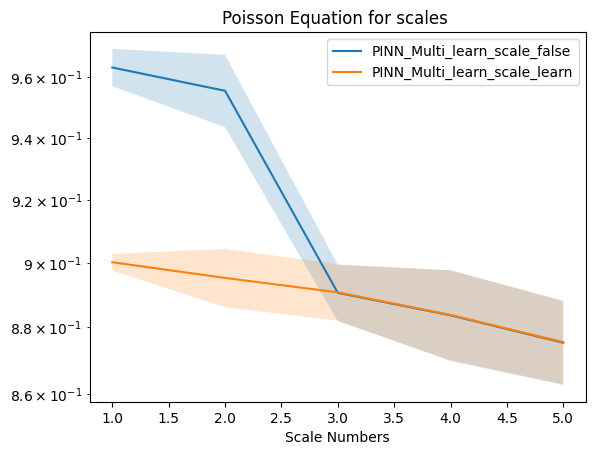

In [21]:

plt.plot(scale, y_scale_false_info["mean"],label=f"PINN_Multi_learn_scale_false")
     # 使用 plt.errorbar 绘制带有误差范围的散点
# 使用 plt.fill_between 绘制带有误差范围的区域
plt.fill_between(scale, np.array(y_scale_false_info["mean"]) - np.array(y_scale_false_info["Std"]), 
                 np.array(y_scale_false_info["mean"]) + np.array(y_scale_false_info["Std"]), alpha=0.2)
plt.plot(scale, y_scale_learn_info["mean"],label=f"PINN_Multi_learn_scale_learn")
plt.fill_between(scale, np.array(y_scale_learn_info["mean"]) - np.array(y_scale_learn_info["Std"]), 
                 np.array(y_scale_learn_info["mean"]) + np.array(y_scale_learn_info["Std"]), alpha=0.2)
plt.xlabel('Scale Numbers')
plt.yscale('log')


plt.title('Poisson Equation for scales ')

# 显示图例
plt.legend()